In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_NN_1.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,NaN,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,NaN,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,NaN,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	25
float64		column 2	25
float64		column 3	20
float64		column 4	40
float64		column 5	56
float64		column 6	61
float64		column 7	25
float64		column 8	50
float64		column 9	45
float64		column 10	41
float64		column 11	35
float64		column 12	55
float64		column 13	20
float64		column 14	20
float64		column 15	75
float64		column 16	35
float64		column 17	30
float64		column 18	36
float64		column 19	40
float64		column 20	45
float64		column 21	45
float64		column 22	41
float64		column 23	35
float64		column 24	55
float64		column 25	51
float64		column 26	31
float64		column 27	20
float64		column 28	55
float64		column 29	21
float64		column 30	55
float64		column 31	45
float64		column 32	35
float64		column 33	50
float64		column 34	40
float64		column 35	45
float64		column 36	30
float64		column 37	60
float64		column 38	25
float64		column 39	40
float64		column 40	36
float64		column 41	56
float64		column 42	55
float64		column 43	21
float64		column 44	45
flo

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4572.000000,4572.000000,4577.000000,4557.000000,4541.000000,4536.000000,4572.000000,4547.000000,4552.000000,4556.000000,...,4577.000000,4577.000000,4557.000000,4547.000000,4567.000000,4572.000000,4572.000000,4557.000000,4541.000000,4562.000000
mean,0.104617,0.213126,0.280317,0.064711,0.311755,0.094932,0.113362,0.104627,0.089356,0.236804,...,0.032036,0.038774,0.138469,0.016753,0.268528,0.075418,0.042855,5.010471,51.778903,283.610039
std,0.306015,1.294039,0.504199,1.399870,0.672419,0.272814,0.389703,0.400390,0.277983,0.641997,...,0.286474,0.244093,0.270292,0.109111,0.817089,0.244071,0.416689,30.287803,194.811216,607.854753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.586000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.187000,0.000000,0.313500,0.052250,0.000000,3.705000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

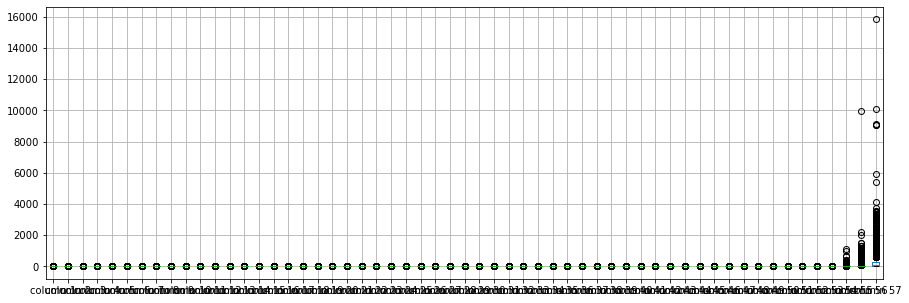

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.104617
column 2       0.213126
column 3       0.280317
column 4       0.064711
column 5       0.311755
column 6       0.094932
column 7       0.113362
column 8       0.104627
column 9       0.089356
column 10      0.236804
column 11      0.059288
column 12      0.539461
column 13      0.093778
column 14      0.058436
column 15      0.047481
column 16      0.248915
column 17      0.141042
column 18      0.183815
column 19      1.655455
column 20      0.084332
column 21      0.809583
column 22      0.122353
column 23      0.101074
column 24      0.091673
column 25      0.542750
column 26      0.264369
column 27      0.756404
column 28      0.121722
column 29      0.098711
column 30      0.102926
column 31      0.063853
column 32      0.046723
column 33      0.095826
column 34      0.047630
column 35      0.106052
column 36      0.097326
column 37      0.135847
column 38      0.012970
column 39      0.078782
column 40      0.063155
column 41      0.040881
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.016746,0.063632,0.013568,0.024769,0.057697,0.005416,-0.003963,0.103611,0.041234,...,-0.017845,-0.026648,-0.023271,-0.032887,0.058301,0.116008,-0.007942,0.040913,0.057696,0.088844
column 2,-0.016746,1.000000,-0.034808,-0.006815,-0.024379,-0.024584,0.002036,-0.016469,-0.004591,0.033095,...,-0.015801,-0.007368,-0.049500,-0.018504,-0.014352,-0.009833,0.002630,0.003250,-0.000485,-0.022487
column 3,0.063632,-0.034808,1.000000,-0.020306,0.074591,0.087372,0.037710,0.010927,0.092338,0.033395,...,-0.026317,-0.033176,-0.013812,-0.038764,0.109467,0.087298,-0.000738,0.083068,0.107634,0.068928
column 4,0.013568,-0.006815,-0.020306,1.000000,0.003740,-0.009648,0.020380,0.010686,-0.002075,-0.004665,...,-0.001859,-0.001871,-0.012054,-0.007006,-0.003371,0.011763,-0.001078,0.005847,0.022324,0.020948
column 5,0.024769,-0.024379,0.074591,0.003740,1.000000,0.055047,0.148833,0.029436,0.020087,0.034843,...,-0.031495,-0.032374,-0.044096,-0.024639,0.025635,0.041276,0.004035,0.048177,0.051734,0.001951
column 6,0.057697,-0.024584,0.087372,-0.009648,0.055047,1.000000,0.062389,0.081635,0.114019,0.016097,...,-0.031281,-0.023970,-0.007955,-0.013001,0.065448,0.107504,0.021666,-0.008599,0.091373,0.081961
column 7,0.005416,0.002036,0.037710,0.020380,0.148833,0.062389,1.000000,0.042980,0.056579,0.054433,...,-0.031312,-0.033025,-0.051234,-0.026392,0.052817,0.072182,0.050482,0.044675,0.060614,-0.007694
column 8,-0.003963,-0.016469,0.010927,0.010686,0.029436,0.081635,0.042980,1.000000,0.102797,0.081752,...,-0.021259,-0.027061,-0.032776,-0.018475,0.030886,0.057709,-0.007037,0.012842,0.035350,0.039898
column 9,0.103611,-0.004591,0.092338,-0.002075,0.020087,0.114019,0.056579,0.102797,1.000000,0.128611,...,-0.025714,-0.014701,-0.030675,0.015036,0.043970,0.147091,0.000044,0.107847,0.184686,0.243690
column 10,0.041234,0.033095,0.033395,-0.004665,0.034843,0.016097,0.054433,0.081752,0.128611,1.000000,...,-0.015599,0.010664,0.002415,0.008498,0.037726,0.076175,0.035441,0.072577,0.100759,0.089621


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+20,17+20+20,17+20+20+20,17+20+20,17+20,17], vae_layer = False, seed = 200)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 677.4397188246458
Epoch: 1 , loss: 680.314967351508
Epoch: 2 , loss: 678.6552676955166
Epoch: 3 , loss: 673.0822319801676
Epoch: 4 , loss: 674.9163485537007
Epoch: 5 , loss: 673.927062749032
Epoch: 6 , loss: 681.9707519318584
Epoch: 7 , loss: 674.1393792022811
Epoch: 8 , loss: 671.0266555094968
Epoch: 9 , loss: 674.7676371398288
Epoch: 10 , loss: 667.0465560009255
Epoch: 11 , loss: 637.8253331201001
Epoch: 12 , loss: 559.0283254430684
Epoch: 13 , loss: 527.8884855795405
Epoch: 14 , loss: 524.0324157289512
Epoch: 15 , loss: 522.2541344406712
Epoch: 16 , loss: 509.5825682051921
Epoch: 17 , loss: 491.8932411645763
Epoch: 18 , loss: 500.12427672276516
Epoch: 19 , loss: 513.5972086677152
Epoch: 20 , loss: 501.87550566669955
Epoch: 21 , loss: 486.9707020350865
Epoch: 22 , loss: 506.9732992989676
Epoch: 23 , loss: 504.77227262171306
Epoch: 24 , loss: 539.0122661789951
Epoch: 25 , loss: 505.4628310785061
Epoch

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000
column 2      0.000
column 3      0.000
column 4      0.000
column 5      0.000
column 6      0.000
column 7      0.000
column 8      0.000
column 9      0.000
column 10     0.000
column 11     0.000
column 12     0.000
column 13     0.000
column 14     0.000
column 15     0.000
column 16     0.000
column 17     0.000
column 18     0.000
column 19     0.000
column 20     0.000
column 21     0.000
column 22     0.000
column 23     0.000
column 24     0.000
column 25     0.000
column 26     0.000
column 27     0.000
column 28     0.000
column 29     0.000
column 30     0.000
column 31     0.000
column 32     0.000
column 33     0.000
column 34     0.000
column 35     0.000
column 36     0.000
column 37     0.000
column 38     0.000
column 39     0.000
column 40     0.000
column 41     0.000
column 42     0.000
column 43     0.000
column 44     0.000
column 45     1.440
column 46     0.000
column 47     0.000
column 48     0.000
column 49     0.000
column 50     0.196


In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,-0.003238,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,-0.578221,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.213065,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4593,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4594,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4595,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

2938.637312979564

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.06191994682430892

In [19]:
new_df.iloc[66,:]

column 1       0.000
column 2       0.440
column 3       0.890
column 4       0.000
column 5       0.440
column 6       0.000
column 7       0.000
column 8       0.000
column 9       0.000
column 10      0.000
column 11      0.000
column 12      0.440
column 13      0.000
column 14      0.000
column 15      0.000
column 16      0.440
column 17      0.000
column 18      0.890
column 19      2.240
column 20      0.000
column 21      1.340
column 22      0.000
column 23      0.000
column 24      0.000
column 25      0.000
column 26      0.000
column 27      0.000
column 28      0.000
column 29      0.000
column 30      0.000
column 31      0.000
column 32      0.000
column 33      0.000
column 34      0.000
column 35      0.000
column 36      0.000
column 37      0.000
column 38      0.000
column 39      0.000
column 40      0.000
column 41      0.000
column 42      0.000
column 43      0.000
column 44      0.000
column 45      0.440
column 46      0.000
column 47      0.000
column 48    

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.320000,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000000,0.000000,0.778,0.000,0.000,3.756000,61.0,278.0
1,0.21,0.28,0.50,0.0,0.140000,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132000,-0.003238,0.372,0.180,0.048,5.114000,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.630000,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135000,0.000000,0.135,0.000,0.000,2.958779,40.0,191.0
3,0.00,0.00,0.00,0.0,1.850000,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223000,0.000000,0.000,0.000,0.000,3.000000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.920000,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054000,0.000000,0.164,0.054,0.000,1.671000,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.134935,0.000000,1.160,0.000,0.000,3.121000,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000000,0.000000,0.000,0.000,0.000,3.043000,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136000,0.000000,0.000,0.000,0.409,1.837000,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.340000,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032000,0.000000,0.065,0.000,0.000,1.189000,5.0,69.0


In [21]:
imputations[-1].to_excel("Spam_NN_1(imp).xlsx", index=False, header=False)